## 1. 상권군집 생성
- DBSCAN을 통해 위/경도 기반의 클러스터링
- 2022년도의 상권 데이터를 기준으로 상권 3단계 클러스터링
- 이 중 모든 1단계 클러스터를 QGIS상에서 다른 데이터(거주 인구)와 비교하여 상권 유형 결정

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
df_fac = pd.read_csv('../data/1-4.화성시_상권정보.csv')
df_use = pd.read_csv('../data/1-11.화성시_공유차량_이용현황.csv')
df_house = pd.read_csv('../data/1-12.공공주택임대_정보(화성시).csv')
df_fac.head()

,com_lc_cd,com_lc_nm,com_mc_cd,com_mc_nm,com_sc_cd,com_sc_nm,ksic_cd,ksic_nm,emd_cd,emd_nm,road_address,lon,lat,std_year
0,F,생활서비스,F14,자동차/이륜차,F14A01,자동차정비/카센타,NaN,NaN,4159036000,팔탄면,경기도 화성시 팔탄면 서해로987번길 7,126.891262,37.149846,2021
1,D,소매,D01,음/식료품소매,D01A01,식료품점,G47219,기타 식료품 소매업,4159034000,송산면,경기도 화성시 송산면 당성로 571,126.723828,37.208587,2021
2,D,소매,D16,화장품소매,D16A01,화장품판매점,G47813,화장품 및 방향제 소매업,4159058500,동탄1동,경기도 화성시 동탄공원로3길 18-23,127.062309,37.207623,2021
3,D,소매,D08,사무/문구/컴퓨터,D08A03,컴퓨터/사무용기기종합,G47311,"컴퓨터 및 주변장치, 소프트웨어 소매업",4159025900,향남읍,경기도 화성시 향남읍 평1길 16,126.909272,37.132694,2021
4,Q,음식,Q01,한식,Q01A02,갈비/삼겹살,I56111,한식 음식점업,4159025900,향남읍,경기도 화성시 향남읍 행정중앙1로 14,126.916244,37.125963,2021


In [3]:
# 2022년 데이터 불러오기
df_fac_2022 = df_fac[df_fac['std_year']==2022]
df_fac_2022.head()

,com_lc_cd,com_lc_nm,com_mc_cd,com_mc_nm,com_sc_cd,com_sc_nm,ksic_cd,ksic_nm,emd_cd,emd_nm,road_address,lon,lat,std_year
28212,F,생활서비스,F14,자동차/이륜차,F14A01,자동차정비/카센타,NaN,NaN,4159036000,팔탄면,경기도 화성시 팔탄면 서해로987번길 7,126.891262,37.149846,2022
28213,D,소매,D03,종합소매점,D03A02,수퍼마켓,G47121,슈퍼마켓,4159058700,동탄3동,경기도 화성시 동탄원천로 315-13,127.061094,37.213011,2022
28214,D,소매,D01,음/식료품소매,D01A01,식료품점,G47219,기타 식료품 소매업,4159034000,송산면,경기도 화성시 송산면 당성로 571,126.723828,37.208587,2022
28215,D,소매,D16,화장품소매,D16A01,화장품판매점,G47813,화장품 및 방향제 소매업,4159058500,동탄1동,경기도 화성시 동탄공원로3길 18-23,127.062309,37.207623,2022
28216,D,소매,D08,사무/문구/컴퓨터,D08A03,컴퓨터/사무용기기종합,G47311,"컴퓨터 및 주변장치, 소프트웨어 소매업",4159025900,향남읍,경기도 화성시 향남읍 평1길 16,126.909272,37.132694,2022


### 1-1) DBSCAN

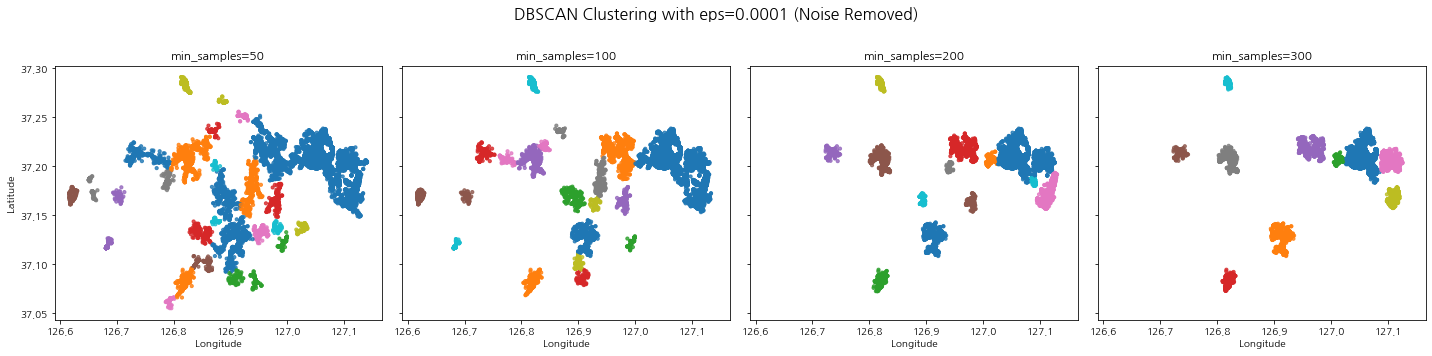

In [65]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# DBSCAN 파라미터 설정
eps = 0.0001  # eps 고정값
min_samples_values = [50, 100, 200, 300]  # min_samples 값들

coords = df_fac_2022[['lat', 'lon']].values  # 위도와 경도 데이터

# 2. 서브플롯 생성
fig, axes = plt.subplots(1, len(min_samples_values), figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle(f"DBSCAN Clustering with eps={eps} (Noise Removed)", fontsize=16)

# 3. DBSCAN 적용 및 시각화
for i, min_samples in enumerate(min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='haversine').fit(np.radians(coords))
    labels = dbscan.labels_  # 군집 레이블 (-1은 잡음)

    # 잡음 제거
    mask = labels != -1
    filtered_lon = df_fac_2022['lon'][mask]
    filtered_lat = df_fac_2022['lat'][mask]
    filtered_labels = labels[mask]

    # 군집 시각화
    scatter = axes[i].scatter(
        filtered_lon, filtered_lat, c=filtered_labels, cmap='tab10', s=10, alpha=0.8
    )
    axes[i].set_title(f"min_samples={min_samples}")
    axes[i].set_xlabel("Longitude")
    if i == 0:
        axes[i].set_ylabel("Latitude")

# 4. 레이아웃 조정 및 표시
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# 1단계 클러스터
import pandas as pd
from sklearn.cluster import DBSCAN
from shapely.geometry import Point
import geopandas as gpd
from shapely.ops import unary_union
import matplotlib.pyplot as plt
coords = df_fac_2022[['lat', 'lon']].values
eps = 0.0001  # 약 100m
min_samples = 50
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='haversine').fit(np.radians(coords))
df_fac_2022['cluster_200m'] = dbscan.labels_

# 2. 클러스터가 존재하는 점들만 선택
valid_clusters = df_fac_2022[df_fac_2022['cluster_200m'] != -1]

# 3. GeoDataFrame 생성
valid_clusters['geometry_200m'] = valid_clusters.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf = gpd.GeoDataFrame(valid_clusters, geometry='geometry_200m', crs="EPSG:4326")

# 클러스터별 버퍼 생성
buffer_distance = 0.005
buffers = []

for cluster_id in gdf['cluster_200m'].unique():
    cluster_points = gdf[gdf['cluster_200m'] == cluster_id]
    cluster_buffer = cluster_points['geometry_200m'].buffer(buffer_distance)
    buffers.append(unary_union(cluster_buffer))  # 병합

# 모든 버퍼 병합
merged_buffers = unary_union(buffers)

# GeoDataFrame으로 변환
buffer_gdf = gpd.GeoDataFrame(geometry=[merged_buffers], crs="EPSG:4326")

# 시각화
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', alpha=0.5, label='Points')
buffer_gdf.plot(ax=ax, color='green', alpha=0.3, label='Buffer Zone')
plt.legend()
plt.show()

# 생성된 폴리곤 내보내기
buffer_gdf.to_csv('하남_상권밀도_1.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from shapely.geometry import Point
import geopandas as gpd
from shapely.ops import unary_union
import matplotlib.pyplot as plt

coords = df_fac_2022[['lat', 'lon']].values
eps = 0.0001  # 약 100m
min_samples = 100
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='haversine').fit(np.radians(coords))
df_fac_2022['cluster_200m'] = dbscan.labels_

# 2. 클러스터가 존재하는 점들만 선택
valid_clusters = df_fac_2022[df_fac_2022['cluster_200m'] != -1]

# 3. GeoDataFrame 생성
valid_clusters['geometry_200m'] = valid_clusters.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf = gpd.GeoDataFrame(valid_clusters, geometry='geometry_200m', crs="EPSG:4326")

# 클러스터별 버퍼 생성
buffer_distance = 0.003
buffers = []

for cluster_id in gdf['cluster_200m'].unique():
    cluster_points = gdf[gdf['cluster_200m'] == cluster_id]
    cluster_buffer = cluster_points['geometry_200m'].buffer(buffer_distance)
    buffers.append(unary_union(cluster_buffer))  # 병합

# 모든 버퍼 병합
merged_buffers = unary_union(buffers)

# GeoDataFrame으로 변환
buffer_gdf = gpd.GeoDataFrame(geometry=[merged_buffers], crs="EPSG:4326")

# 시각화
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', alpha=0.5, label='Points')
buffer_gdf.plot(ax=ax, color='green', alpha=0.3, label='Buffer Zone')
plt.legend()
plt.show()

# 생성된 폴리곤 내보내기
buffer_gdf.to_csv('하남_상권밀도_2.csv', index=False)

In [ ]:
# 3단계 클러스터링
coords = df_fac_2022[['lat', 'lon']].values
eps = 0.0001  # 약 100m
min_samples = 300
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='haversine').fit(np.radians(coords))
df_fac_2022['cluster_200m'] = dbscan.labels_

# 클러스터가 존재하는 점들만 선택
valid_clusters = df_fac_2022[df_fac_2022['cluster_200m'] != -1]

# GeoDataFrame 생성
valid_clusters['geometry_200m'] = valid_clusters.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf = gpd.GeoDataFrame(valid_clusters, geometry='geometry_200m', crs="EPSG:4326")

# 클러스터별 버퍼 생성
buffer_distance = 0.001
buffers = []

for cluster_id in gdf['cluster_200m'].unique():
    cluster_points = gdf[gdf['cluster_200m'] == cluster_id]
    cluster_buffer = cluster_points['geometry_200m'].buffer(buffer_distance)
    buffers.append(unary_union(cluster_buffer))  # 병합

# 모든 버퍼 병합
merged_buffers = unary_union(buffers)

# GeoDataFrame으로 변환
buffer_gdf = gpd.GeoDataFrame(geometry=[merged_buffers], crs="EPSG:4326")

# 시각화
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', alpha=0.5, label='Points')
buffer_gdf.plot(ax=ax, color='green', alpha=0.3, label='Buffer Zone')
plt.legend()
plt.show()

# 생성된 폴리곤 내보내기
buffer_gdf.to_csv('하남_상권밀도_3.csv', index=False)

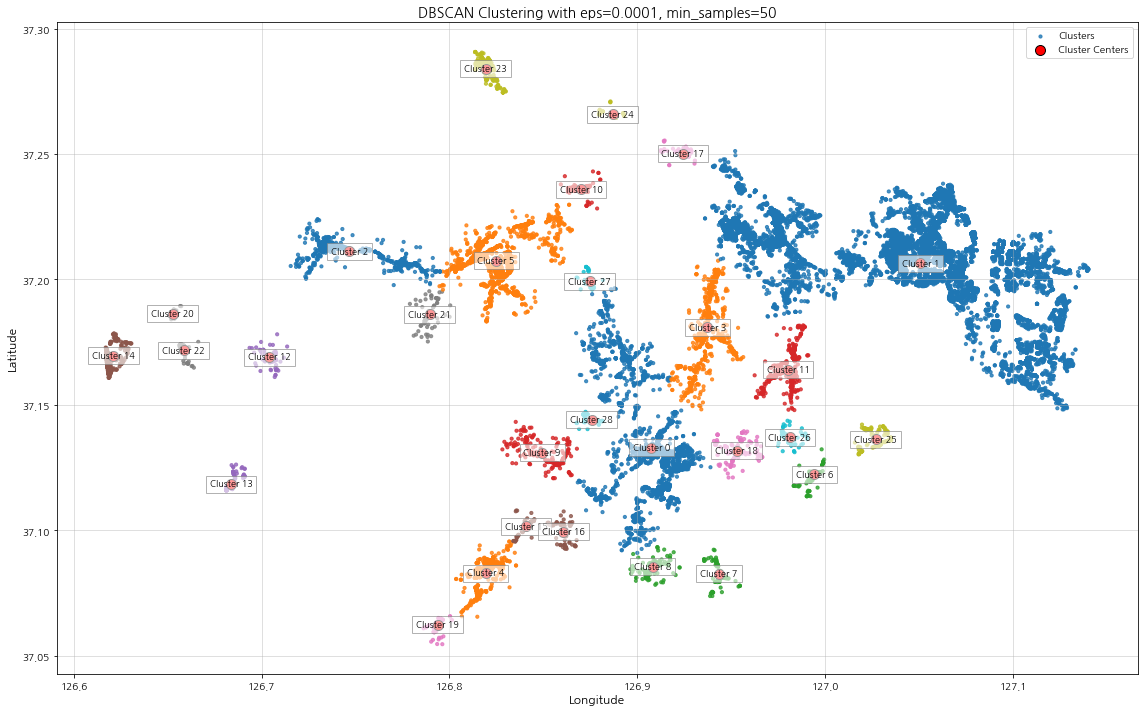

In [72]:
# 클러스터 시각화
plt.figure(figsize=(16, 10))
plt.title(f"DBSCAN Clustering with eps={eps}, min_samples={min_samples}", fontsize=14)

# 클러스터 시각화
scatter = plt.scatter(
    valid_clusters['lon'], valid_clusters['lat'], 
    c=valid_clusters['cluster_label'], cmap='tab10', s=10, alpha=0.8, label='Clusters'
)

# 클러스터 중심점 시각화
plt.scatter(
    cluster_centers['center_lon'], cluster_centers['center_lat'], 
    c='red', s=100, label='Cluster Centers', edgecolor='black'
)

# 클러스터 중심점에 라벨 표시
for _, row in cluster_centers.iterrows():
    plt.text(
        row['center_lon'], row['center_lat'], 
        f"Cluster {int(row['cluster_label'])}", 
        fontsize=9, color='black', ha='center', va='center', 
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray')
    )

# 레이블, 범례, 축 설정
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()

# 결과 출력
plt.show()

## 2022년 상권-공유차량 관계 관찰

In [6]:
import pandas as pd
import geopandas as gpd

# 2022년 화성의 상권 데이터 불러오기
df_2022 = pd.read_csv('.././data/화성2022.csv')

# 격자 정보 불러오기
gdf = gpd.read_file(".././data/1-14.화성시_격자.geojson")
fac_2022 = df_2022[['gid', 'fac_density', 'cluster']].merge(gdf, on='gid')
fac_2022

,gid,fac_density,cluster,geometry
0,다사385011,0.0,NaN,"POLYGON ((126.80784 37.10654, 126.80783 37.107..."
1,다사312110,1.0,일반상권,"POLYGON ((126.72478 37.19526, 126.72477 37.196..."
2,다사473033,3.0,주택상권,"POLYGON ((126.90672 37.12690, 126.90671 37.127..."
3,다사602117,3.0,복합상권,"POLYGON ((127.05149 37.20326, 127.05149 37.204..."
4,다사476205,0.0,NaN,"POLYGON ((126.90889 37.28195, 126.90888 37.282..."
...,...,...,...,...
71379,다사513058,0.0,NaN,"POLYGON ((126.95159 37.14965, 126.95158 37.150..."
71380,다사553001,0.0,NaN,"POLYGON ((126.99697 37.09848, 126.99696 37.099..."
71381,다사517088,1.0,일반상권,"POLYGON ((126.95590 37.17672, 126.95589 37.177..."
71382,다사456150,0.0,NaN,"POLYGON ((126.88673 37.23227, 126.88673 37.233..."


In [7]:
import geopandas as gpd
# 화성 지역 데이터 불러오기
shapefile_path = ".././data/QGIS/타겟지역.shp"  # shapefile 경로
region = gpd.read_file(shapefile_path)

# 화성시 데이터만 불러오기
region_h = region[region['SGG_NM']=='경기도 화성시']
region_h

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry
1,41590,경기도 화성시,1978,41590,"MULTIPOLYGON (((126.72566 37.00909, 126.72562 ..."


In [11]:
# 블록단지별로 세대수와 주차면서 합계 및 위도 경도 추출
df_num = df_house.groupby('blck_cd').agg(
    noh=('noh', 'sum'),
    parking_slot=('parking_slot', 'sum'),
    lon=('lon', 'first'),
    lat=('lat', 'first')
).reset_index()

# 반영한 데이터프레임 생성
df_log = df_use.merge(df_num, on='blck_cd')
df_log

,cmplx_nm,blck_cd,cnt_2008,tm_2008,cnt_2009,tm_2009,cnt_2010,tm_2010,cnt_2011,tm_2011,...,cnt_2312,tm_2312,total_cnt,total_tm,car_type,car_cnt,noh,parking_slot,lon,lat
0,화성남양뉴타운10,C02347,41.0,152.0,42.0,181.0,26.0,82.0,35.0,58.0,...,8.0,29.0,855,2888,모닝어반,1.0,1022,1533.0,126.834651,37.206978
1,화성남양뉴타운4,C01961,25.0,224.0,6.0,43.0,1.0,6.0,2.0,2.0,...,NaN,NaN,104,645,NaN,NaN,876,1314.0,126.829787,37.210028
2,화성남양뉴타운9,C02042,11.0,82.0,13.0,20.0,22.0,17.0,36.0,50.0,...,NaN,NaN,889,2151,NaN,NaN,782,1173.0,126.833895,37.209028
3,화성능동7-2,C01569,45.0,142.0,44.0,117.0,63.0,263.0,39.0,113.0,...,27.0,50.0,1377,3912,더뉴레이,1.0,963,1444.5,127.061128,37.211268
4,화성동탄2 28(행복주택),C02333,55.0,128.0,63.0,169.0,45.0,102.0,47.0,133.0,...,45.0,74.0,2090,6514,더뉴레이/올뉴모닝,2.0,816,1224.0,127.094684,37.163702
5,화성동탄2 레이크빌,C01890,13.0,26.0,19.0,44.0,22.0,122.0,14.0,41.0,...,0.0,0.0,937,2590,올뉴모닝,1.0,754,1131.0,127.103636,37.176328
6,화성동탄2 르파비스,C02014,31.0,125.0,25.0,85.0,39.0,119.0,36.0,102.0,...,13.0,16.0,1486,4975,올뉴K3,1.0,876,1314.0,127.126406,37.183691
7,화성동탄2 서희스타힐스24,C02015,26.0,165.0,31.0,90.0,24.0,91.0,29.0,138.0,...,31.0,62.0,1581,4013,더뉴레이,1.0,882,1323.0,127.118188,37.173069
8,화성동탄2 센트럴써밋,C02329,NaN,NaN,NaN,NaN,NaN,NaN,5.0,16.0,...,44.0,108.0,1326,3669,더뉴레이,1.0,740,1110.0,127.123518,37.175706
9,화성동탄2 아너스빌,C02160,22.0,72.0,23.0,92.0,28.0,90.0,30.0,96.0,...,16.0,91.0,1243,4510,더뉴레이,1.0,924,1386.0,127.127443,37.186354


In [20]:
fac_2022

,gid,fac_density,cluster,geometry
0,다사385011,0.0,NaN,"POLYGON ((126.80784 37.10654, 126.80783 37.107..."
1,다사312110,1.0,일반상권,"POLYGON ((126.72478 37.19526, 126.72477 37.196..."
2,다사473033,3.0,주택상권,"POLYGON ((126.90672 37.12690, 126.90671 37.127..."
3,다사602117,3.0,복합상권,"POLYGON ((127.05149 37.20326, 127.05149 37.204..."
4,다사476205,0.0,NaN,"POLYGON ((126.90889 37.28195, 126.90888 37.282..."
...,...,...,...,...
71379,다사513058,0.0,NaN,"POLYGON ((126.95159 37.14965, 126.95158 37.150..."
71380,다사553001,0.0,NaN,"POLYGON ((126.99697 37.09848, 126.99696 37.099..."
71381,다사517088,1.0,일반상권,"POLYGON ((126.95590 37.17672, 126.95589 37.177..."
71382,다사456150,0.0,NaN,"POLYGON ((126.88673 37.23227, 126.88673 37.233..."


## 최종시각화

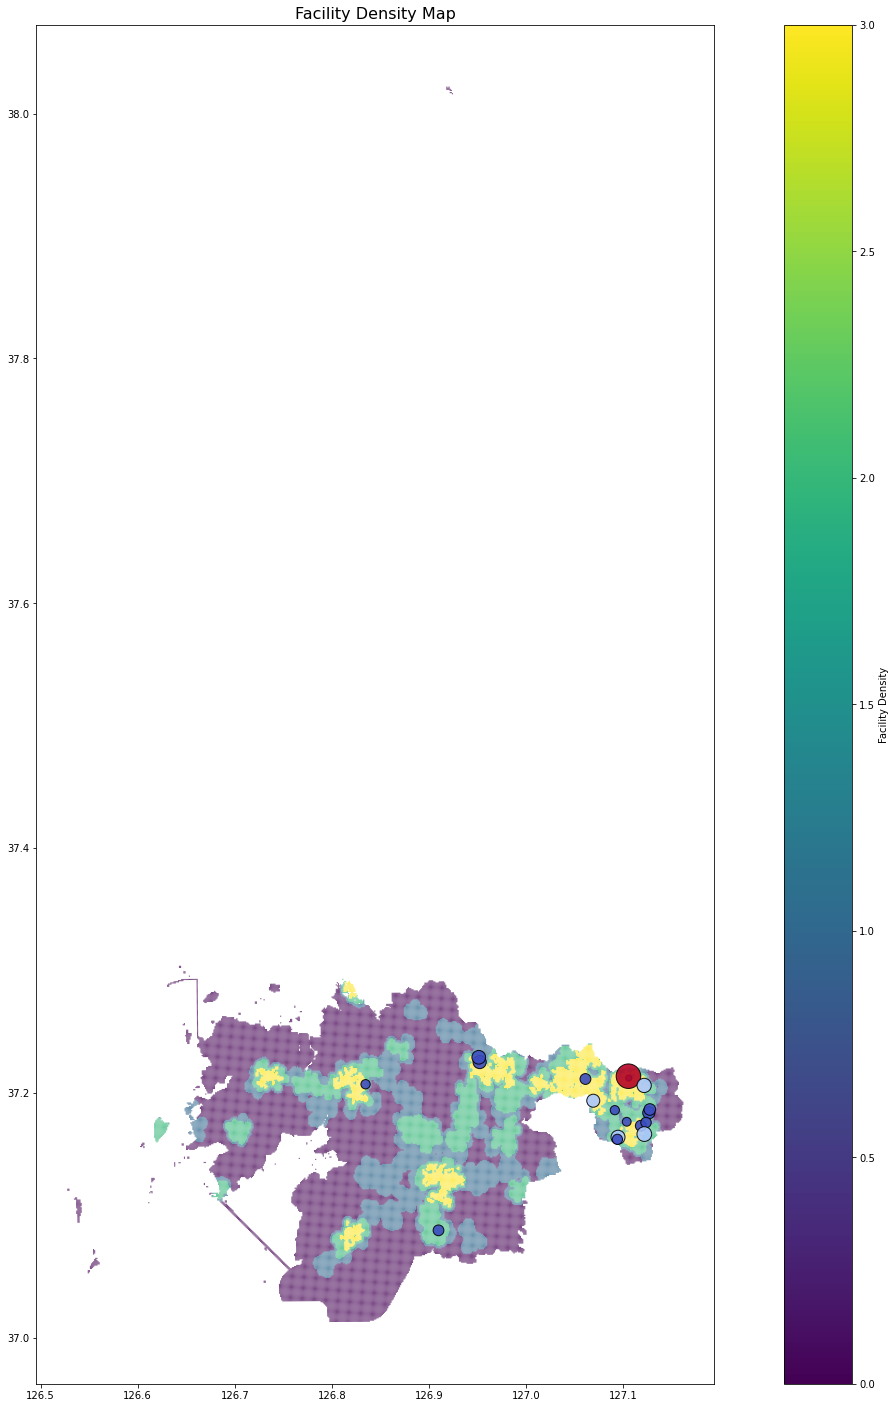

In [45]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# fac_2022를 GeoDataFrame으로 변환
gdf_2022 = gpd.GeoDataFrame(fac_2022, geometry='geometry', crs="EPSG:4326")

# 크기는 total_time, 색상은 car_cnt에 매핑
norm = Normalize(vmin=df_log['car_cnt'].min(), vmax=df_log['car_cnt'].max())
cmap = cm.get_cmap('coolwarm')

# 시설 밀도 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(25,25))
gdf_2022.plot(
    column='fac_density',        # 매핑할 데이터 컬럼
    cmap='viridis',              # 색상 맵
    legend=True,                 # 범례 표시
    legend_kwds={'label': "Facility Density"},  # 범례 레이블
    ax=ax,                       # 축 설정
    alpha=0.7                    # 투명도
)

# 추가 포인트(차량 데이터) 시각화
sc = ax.scatter(
    df_log['lon'],               # 경도
    df_log['lat'],               # 위도
    s=df_log['total_tm'] * 0.03,  # 크기 조정
    c=df_log['car_cnt'],         # 색상 매핑
    cmap=cmap,                   # 색상 맵
    norm=norm,                   # 색상 정규화
    alpha=0.9,                   # 투명도
    edgecolor='k',               # 포인트 테두리
    label='Car Count'
)

# 그래프 제목 설정
plt.title("Facility Density Map", fontsize=16)
plt.show()

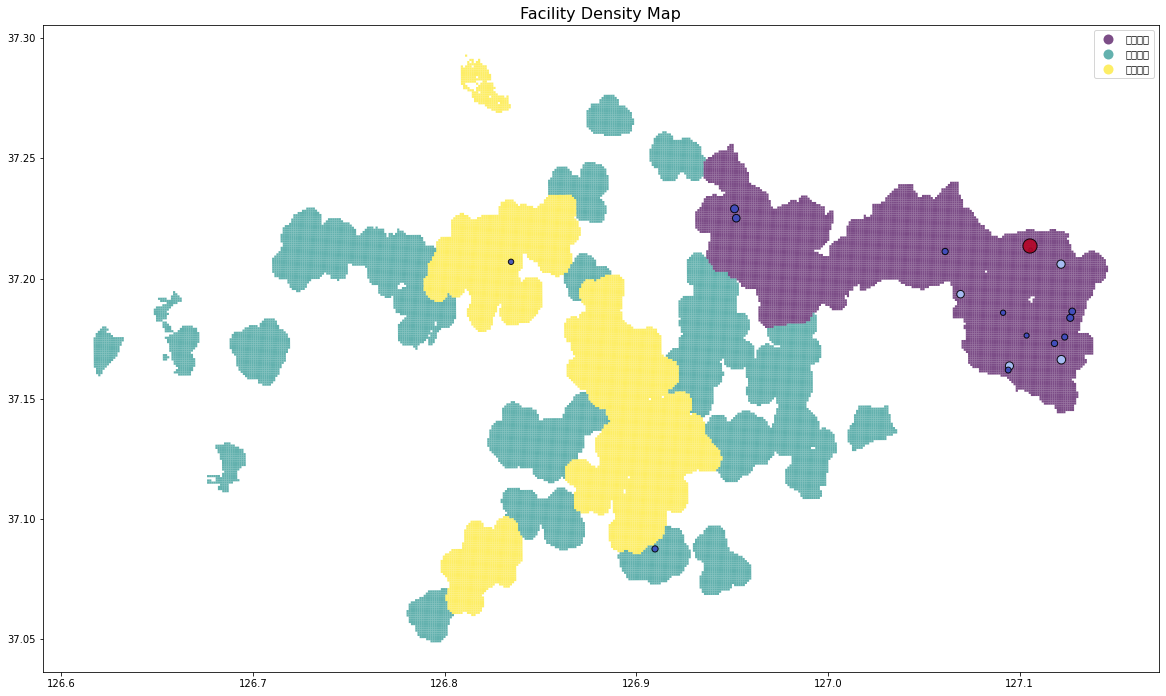

In [42]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

fac_2022_t = fac_2022[fac_2022['cluster'].notna()]

# fac_2022를 GeoDataFrame으로 변환
gdf_2022 = gpd.GeoDataFrame(fac_2022_t, geometry='geometry', crs="EPSG:4326")

# 크기는 total_time, 색상은 car_cnt에 매핑
norm = Normalize(vmin=df_log['car_cnt'].min(), vmax=df_log['car_cnt'].max())
cmap = cm.get_cmap('coolwarm')

# 시설 밀도 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(20, 40))
gdf_2022.plot(
    column='cluster',        # 매핑할 데이터 컬럼
    cmap='viridis',              # 색상 맵
    legend=True,                 # 범례 표시
    ax=ax,                       # 축 설정
    alpha=0.7                    # 투명도
)

# 추가 포인트(차량 데이터) 시각화
sc = ax.scatter(
    df_log['lon'],               # 경도
    df_log['lat'],               # 위도
    s=df_log['total_tm'] * 0.01,  # 크기 조정
    c=df_log['car_cnt'],         # 색상 매핑
    cmap=cmap,                   # 색상 맵
    norm=norm,                   # 색상 정규화
    alpha=0.9,                   # 투명도
    edgecolor='k',               # 포인트 테두리
    label='Car Count'
)

# 그래프 제목 설정
plt.title("Facility Density Map", fontsize=16)
plt.show()